# Prediction of Student Success: A Machine Learning Approach

<p style="font-size:16px">
<strong>Autores:</strong> Amanda Carneiro, Kelton Da Silva,Pedro Da Graça <br>
<strong>Curso:</strong> IA e Ciência de Dados – 1º Ano, 2º Semestre <br>
<strong>Ano Letivo:</strong> 2024/2025
</p>


### Introduction

In the context of secondary education, the early identification of students who are at risk of failing is crucial for implementing timely interventions. This project aims to develop a machine learning pipeline capable of predicting whether a student will pass their final exam, using the UCI Student Performance dataset.

The dataset contains demographic, social, and academic information of students from two Portuguese schools. By applying supervised learning techniques, we aim to build a reliable classification model that can help educators and school administrators identify students in need of academic support.

This notebook presents the full development of the system, including:
- 1. Exploratory Data Analysis (EDA),
- 2. Data cleaning and preprocessing,
- 3. Data Modeling (Supervised Leanirng),
- 4. Performance Evaluation,
- 5. Result interpretation and discussion.
- 6. (Extra) Clustering

Our goal is to contribute to responsible AI practices in education by providing explainable, data-driven insights to support student success.



## 1. Exploratory Data Analysis (EDA)

### 1.1 - Importing Modules

The following technologies and libraries were used throughout this project:

- [**Python**](https://www.python.org/) – Primary programming language.
- [**Anaconda**](https://www.anaconda.com/) – Distribution that simplifies package and environment management.
- [**Project Jupyter**](https://jupyter.org/) – Interactive notebook environment for data science workflows.
- [**NumPy**](https://numpy.org/) – Library for numerical and array-based operations.
- [**SciPy**](https://www.scipy.org/) – Scientific extensions for NumPy.
- [**Pandas**](https://pandas.pydata.org/) – Data structure and tabular analysis library.
- [**Scikit-Learn**](https://scikit-learn.org/) – Machine learning tools for classification, regression, and more.
- [**MatPlotLib**](https://matplotlib.org/) – Basic plotting and visualization library.
- [**Seaborn**](https://seaborn.pydata.org/) – Statistical data visualization built on top of MatPlotLib.


In [43]:
#Importing Modules with shortcuts
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


### 1.2 - The Dataset

For this project, we will use the dataset provided on Moodle, a file named **"student-data.csv"**. This dataset contains student-related information such as demographics, family background, school performance, and social factors.

####    1.2.1 - Loading the Dataset

We will load the CSV file using the **Pandas** library and store it in a variable named **`sd`** (short for "student data").


In [44]:
#Read 'student-data.csv' file using Pandas
sd = pd.read_csv("student-data.csv", sep=',')

#### 1.2.2 - About the Dataset

The main objective of this dataset is to predict whether a student will **pass the final exam**, based on a combination of demographic, academic, social, and behavioral features.




In [45]:
#Type of Dataframe 'sd'
type(sd)

pandas.core.frame.DataFrame

#### 1.2.3 - Initial Structure of the Dataset

The data was collected from two Portuguese secondary schools. Each row in the dataset represents a single student, and the columns describe various attributes related to their demographics, academic background, and social context. Below is a description of the available columns:

| Column       | Description                                                                |
| ------------ | -------------------------------------------------------------------------- |
| `school`     | School the student attends *(e.g., "GP", "MS")*                            |
| `sex`        | Gender of the student: `F` = female, `M` = male                            |
| `age`        | Age of the student (integer)                                               |
| `address`    | Home address type: `U` = urban, `R` = rural                                |
| `famsize`    | Family size: `LE3` = 3 or less, `GT3` = more than 3                        |
| `Pstatus`    | Parent's cohabitation status: `T` = together, `A` = apart                  |
| `Medu`       | Mother’s education level (0 = none to 4 = higher education)                |
| `Fedu`       | Father’s education level (same scale as `Medu`)                            |
| `Mjob`       | Mother’s job (e.g., "at\_home", "health", "services", "teacher", etc.)     |
| `Fjob`       | Father’s job (same values as `Mjob`)                                       |
| `reason`     | Reason for choosing the school (e.g., "home", "course", "reputation")      |
| `guardian`   | Student's legal guardian (`mother`, `father`, `other`)                     |
| `traveltime` | Travel time to school (1 = <15min, 2 = 15–30min, 3 = 30min–1h, 4 = >1h)    |
| `studytime`  | Weekly study time (1 = <2h, 2 = 2–5h, 3 = 5–10h, 4 = >10h)                 |
| `failures`   | Number of past class failures (0–3, where 3 means "3 or more")             |
| `schoolsup`  | Extra educational support (`yes` or `no`)                                  |
| `famsup`     | Family educational support (`yes` or `no`)                                 |
| `paid`       | Extra paid classes (e.g., tutoring) (`yes` or `no`)                        |
| `activities` | Participation in extracurricular activities (`yes` or `no`)                |
| `nursery`    | Attended nursery school (`yes` or `no`)                                    |
| `higher`     | Aspires to higher education (`yes` or `no`)                                |
| `internet`   | Internet access at home (`yes` or `no`)                                    |
| `romantic`   | In a romantic relationship (`yes` or `no`)                                 |
| `famrel`     | Quality of family relationships (1 = very bad to 5 = excellent)            |
| `freetime`   | Free time after school (1 = very low to 5 = very high)                     |
| `goout`      | Frequency of going out with friends (1 = very low to 5 = very high)        |
| `Dalc`       | Workday alcohol consumption (1 = very low to 5 = very high)                |
| `Walc`       | Weekend alcohol consumption (1 = very low to 5 = very high)                |
| `health`     | Current health status (1 = very bad to 5 = very good)                      |
| `absences`   | Number of school absences (integer)                                        |
| `passed`     | Target variable: whether the student passed the final exam (`yes` or `no`) |


In [46]:
#Exemple first 5 rows of sd
pd.set_option('display.max_columns', None)
sd.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


### 1.3 - Initial Exploratory Data Analysis

In this section, we conduct a general exploratory data analysis (EDA) to understand the structure and quality of the dataset. This includes:

- The target variable
- Number of records and features
- Feature types (categorical, numerical, ordinal)
- Distribution of the target variable
- Detection of missing values
- Potential outliers or underrepresented concepts
- Basic value distribution across selected attributes

**Target Variable: passed**
In this project, the chosen target variable is `'passed'`, which indicates whether a student succeeded (yes) or failed (no) in the final evaluation of the course. This binary classification simplifies the prediction problem and allows us to focus on the identification of students at risk of failure.

Although the original dataset includes continuous academic performance metrics (such as grades), the passed variable is already preprocessed to reflect a meaningful outcome for educational stakeholders: did the student pass or not?

By using this as the target, we can:

Support decision-making processes for early intervention strategies.

Analyze patterns of success and failure based on demographic, academic, and behavioral data.

Build interpretable models that help explain which factors most contribute to academic success.

This choice aligns with the project objective of creating predictive tools with real-world applicability, particularly in educational settings.


#### 1.3.1 - Dataset Dimensions and Feature Types


In [47]:
#Check the number of rows and columns
print(f"The dataset contains {sd.shape[0]} rows and {sd.shape[1]} columns.")

#Get general info about data types and missing values
sd.info()


The dataset contains 395 rows and 31 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nurs

In [48]:
#Check data types of each column
sd.dtypes.value_counts()

object    18
int64     13
Name: count, dtype: int64

#### 1.3.1.1 Attribute Type Categorization

Based on the raw data types and value patterns, we classify the dataset features into:

- **Numeric features**: These are continuous or discrete values stored as integers (e.g., `age`, `Medu`, `Fedu`, `absences`).
- **Boolean features**: Although stored as strings (`object`), these contain only the values `'yes'` and `'no'`. They are treated as binary attributes and will later be mapped to `1` and `0`. Examples include `schoolsup`, `famsup`, `paid`, `activities`, `romantic`, etc.
- **Categorical features**: These are nominal string variables with more than two categories, such as `school`, `Mjob`, `Fjob`, `reason`, and `guardian`.

This classification guides how each variable will be preprocessed:
- **Numerical** → scaling/normalization
- **Categorical** → one-hot encoding
- **Boolean** → binary conversion


From the output above, we can identify the data types of each feature and confirm whether there are any null (missing) values in the dataset.


In [49]:
# Detect attribute types
numeric_features = sd.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check object-type columns
categorical_candidates = sd.select_dtypes(include='object').columns

# Separate boolean vs categorical
boolean_features = []
categorical_features = []

for col in categorical_candidates:
    unique_vals = sd[col].dropna().unique()
    if set(unique_vals).issubset({'yes', 'no'}):
        boolean_features.append(col)
    else:
        categorical_features.append(col)

# Output the classification
print("Numeric features:", numeric_features)
print("Boolean features:", boolean_features)
print("Categorical features:", categorical_features)


Numeric features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Boolean features: ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed']
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']


#### 1.3.2 - Checking for Missing Values

The dataset appears to contain no missing values, which simplifies the preprocessing step. However, further cleaning may be needed to address outliers or inconsistent categorical values.


In [50]:
#Count missing values per column
sd.isnull().sum().sort_values(ascending=False)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

#### 1.3.3 - Class Distribution (Target Variable: passed)
This section examines how balanced or imbalanced the target variable `passed` is, which is essential for modeling. A strong imbalance could require resampling techniques.




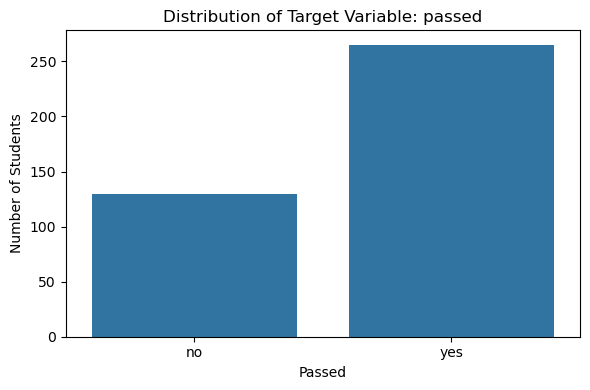

Data in Percentual:
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


In [51]:
#Plot of Distribution of 'passed'
plt.figure(figsize=(6,4))
sns.countplot(data=sd, x='passed')
plt.title('Distribution of Target Variable: passed')
plt.ylabel('Number of Students')
plt.xlabel('Passed')
plt.tight_layout()
plt.show()

#Porcentual
print("Data in Percentual:")
print(sd['passed'].value_counts(normalize=True) * 100)

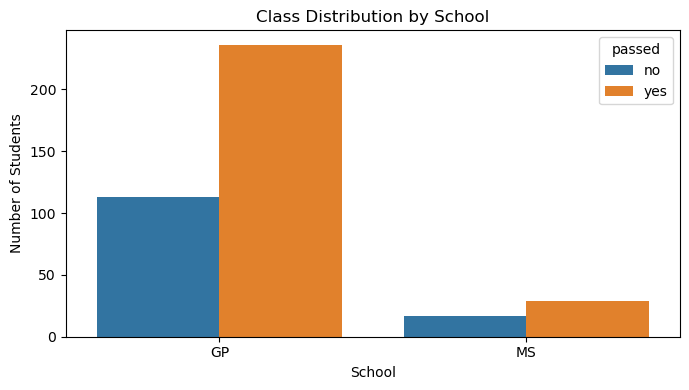

Data in percentual:
passed         no        yes
school                      
GP      32.378223  67.621777
MS      36.956522  63.043478
Number for school
school
GP    349
MS     46
Name: count, dtype: int64


In [52]:
#Plot of Distribution of 'passed' - by school

plt.figure(figsize=(7,4))
sns.countplot(data=sd, x='school', hue='passed')
plt.title('Class Distribution by School')
plt.ylabel('Number of Students')
plt.xlabel('School')
plt.tight_layout()
plt.show()

#Percentual
print('Data in percentual:')
percent_by_school = sd.groupby('school')['passed'].value_counts(normalize=True).unstack() * 100
print(percent_by_school)
print('Number for school')
print((sd['school']).value_counts())


### 1.3.4 - Distribution of Numeric Features

We use histograms to understand the shape of numeric features.

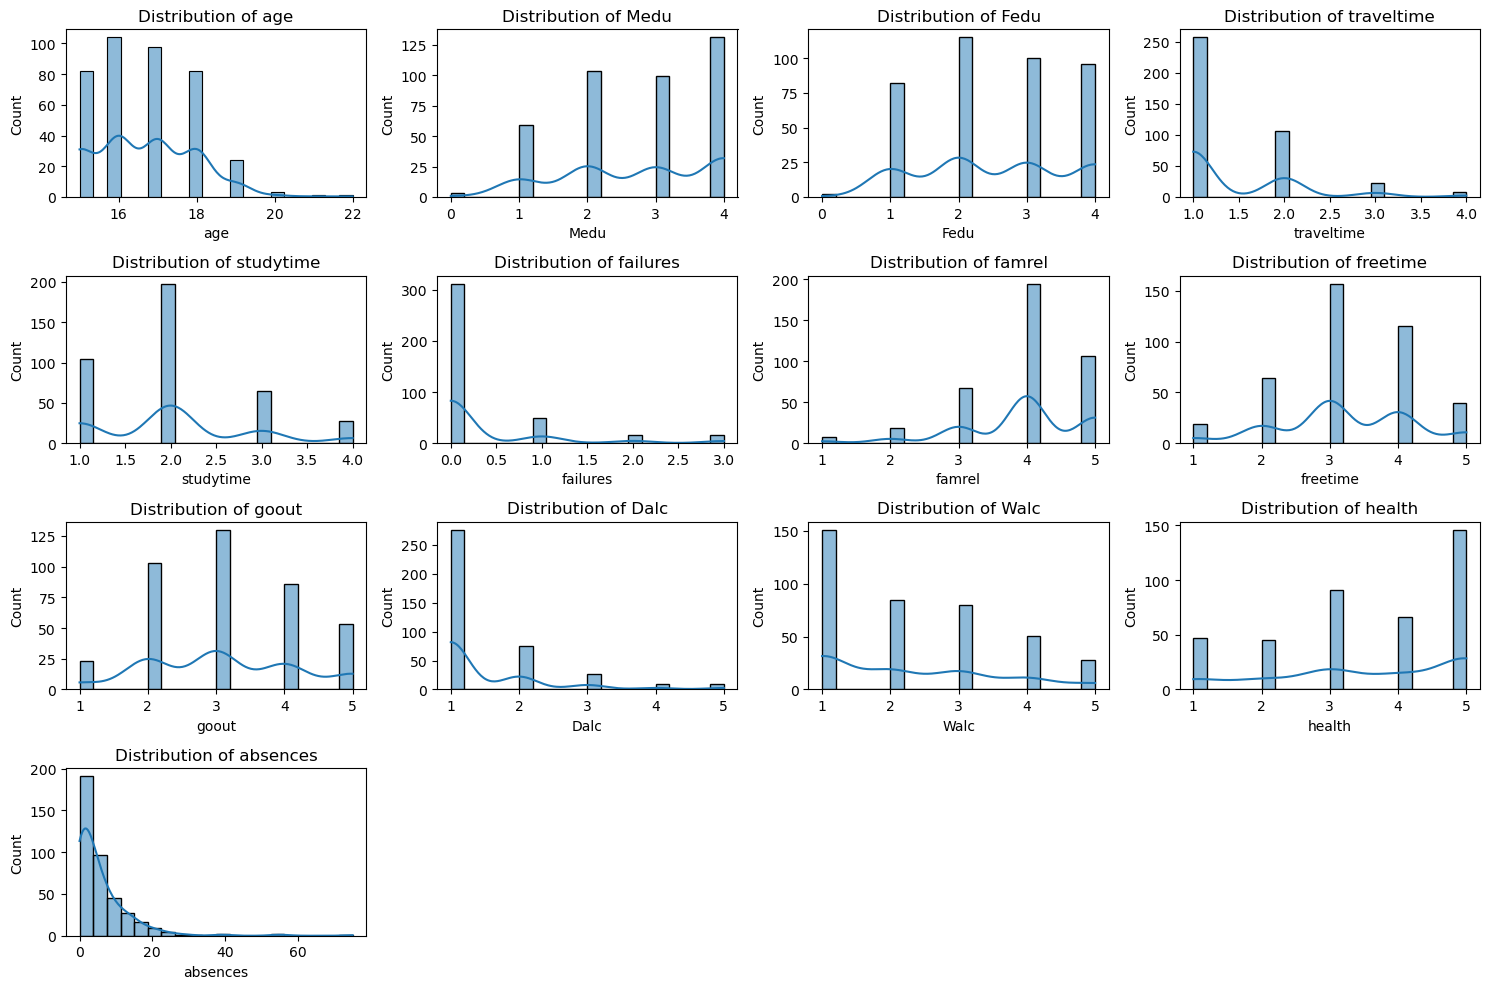

In [53]:
numeric_cols = sd.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(sd[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

### 1.3.5 - Frequency of Categorical Features

We count the occurrences of each category for all categorical variables.

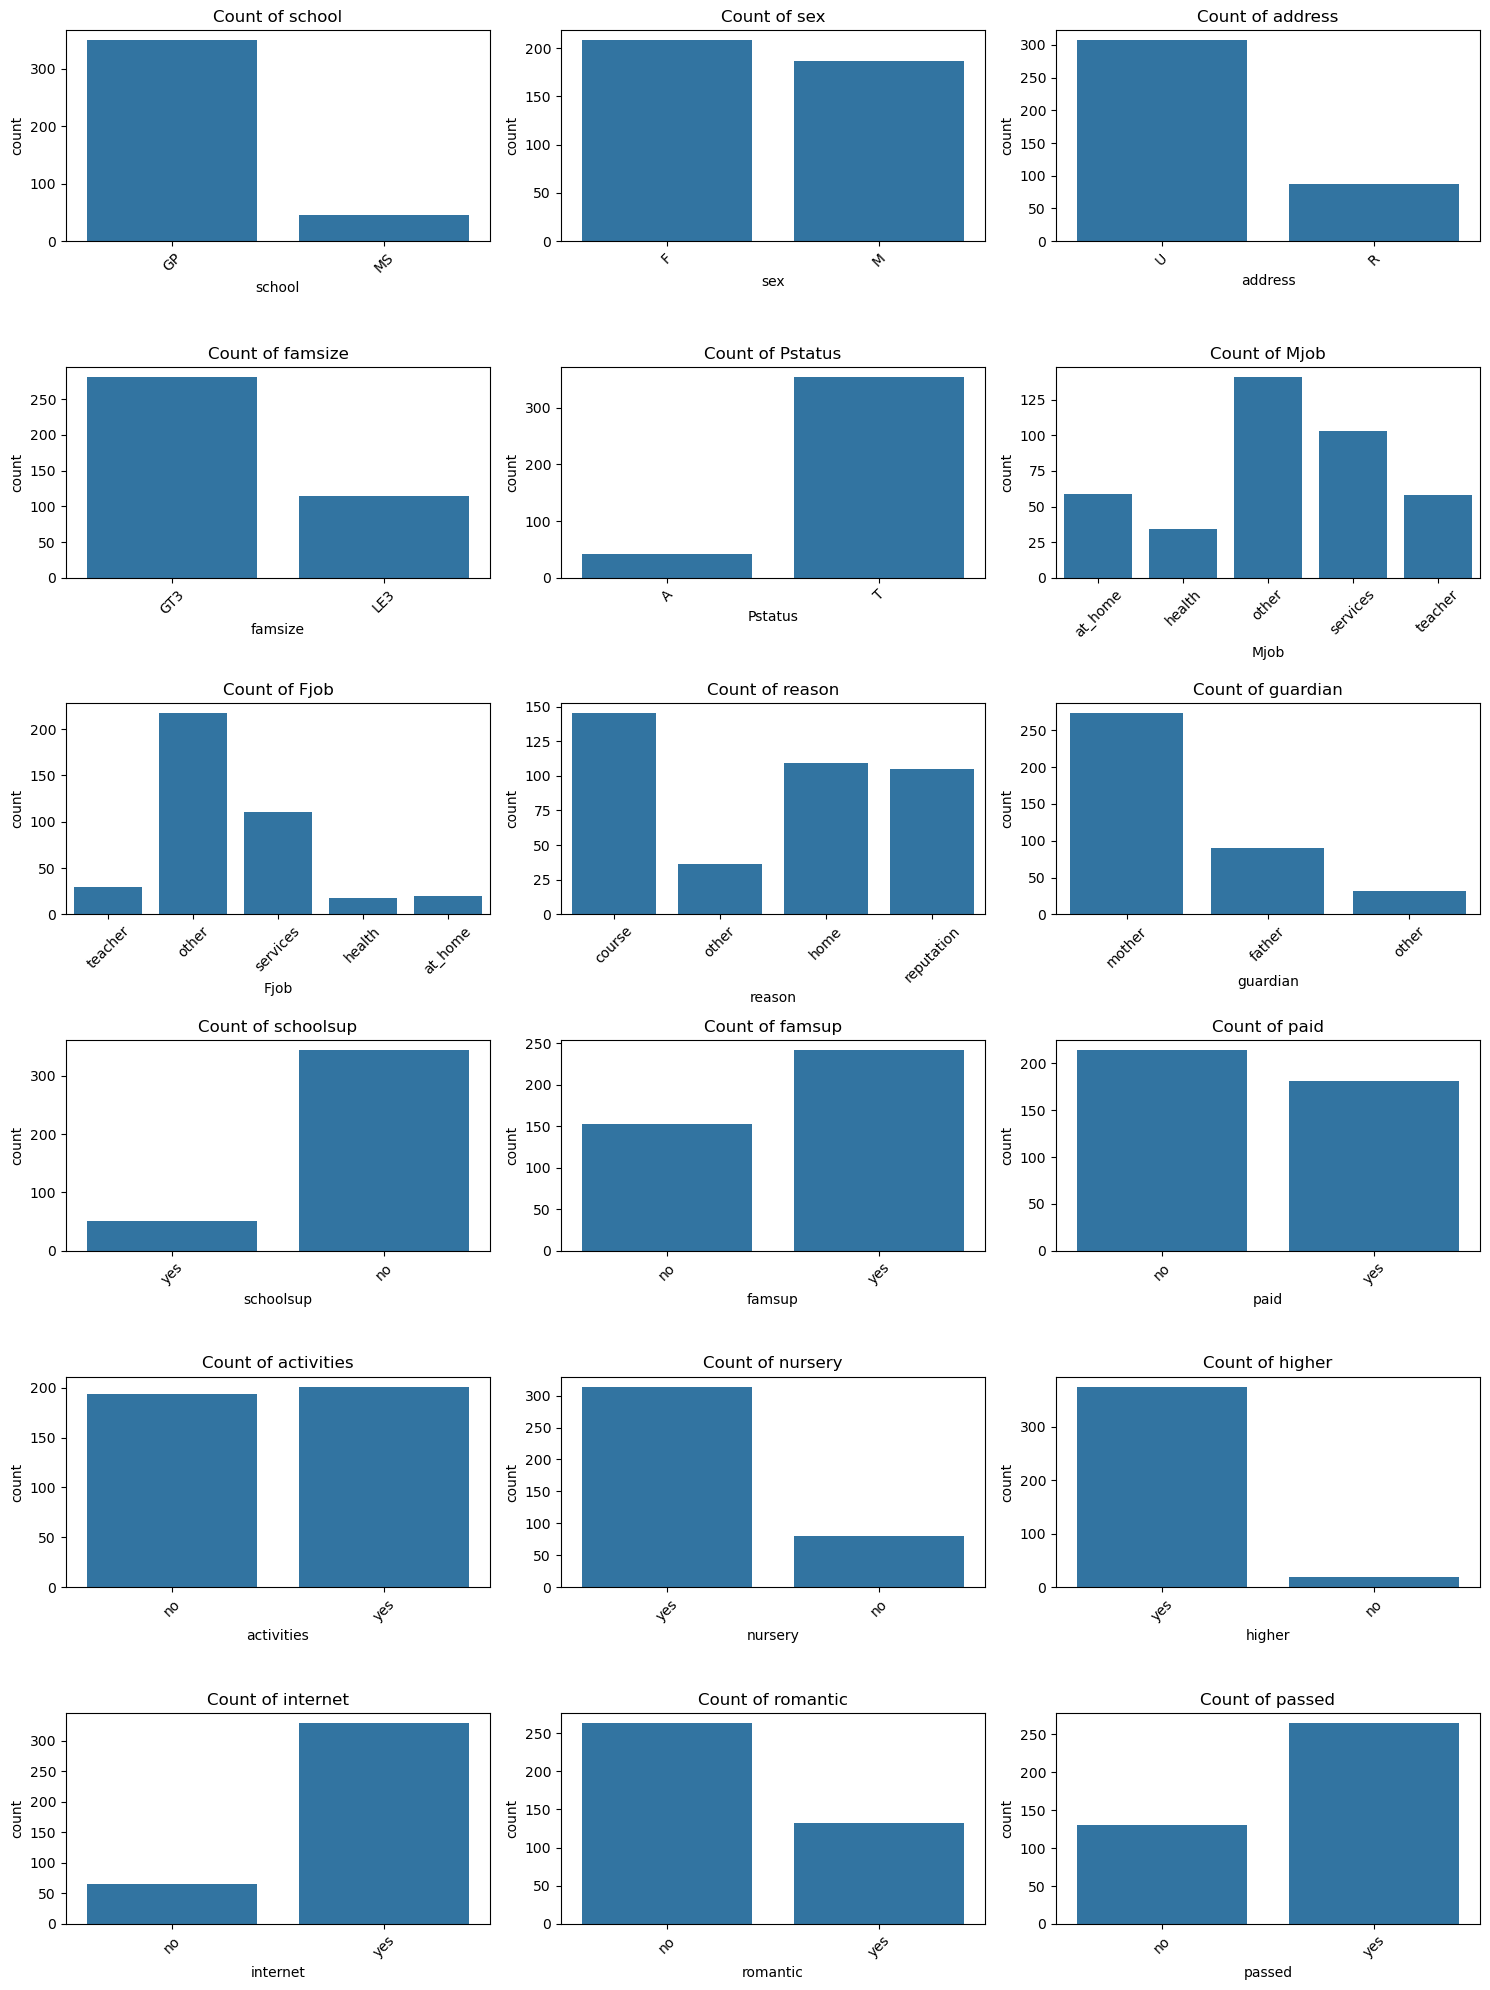

In [54]:
categorical_cols = sd.select_dtypes(include='object').columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=sd, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.tight_layout()

### 1.3.7 - Numeric Features vs Target (Boxplots)

We visualize how numeric features vary between students who passed and failed.

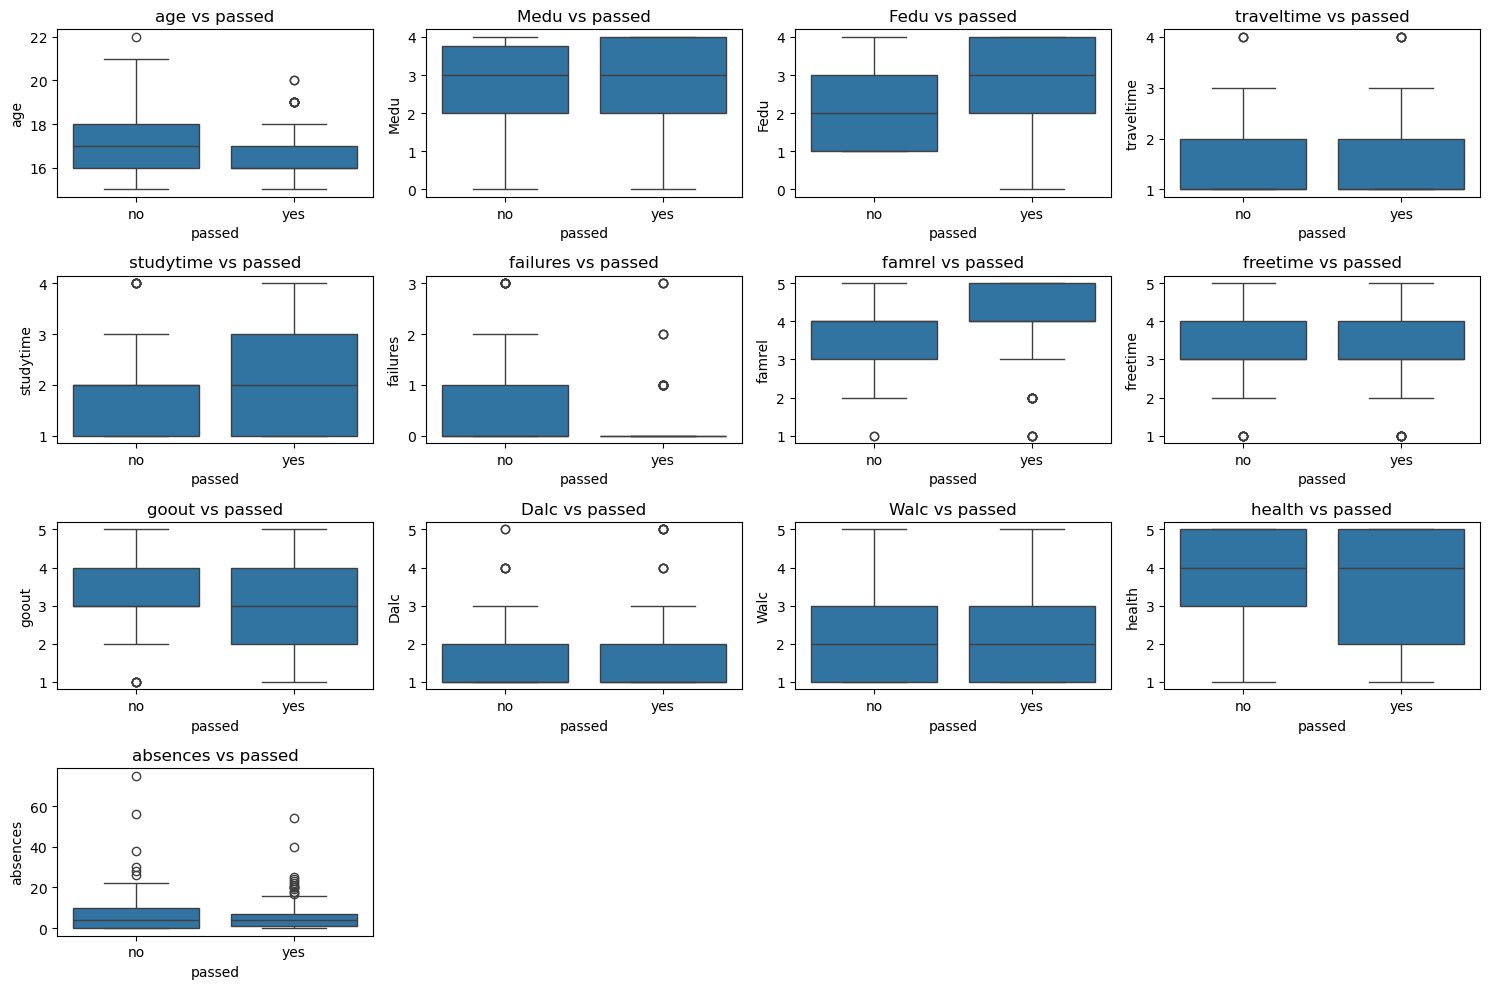

In [55]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='passed', y=col, data=sd)
    plt.title(f'{col} vs passed')
    plt.tight_layout()

### 1.3.8 - Additional Relevant Relationships

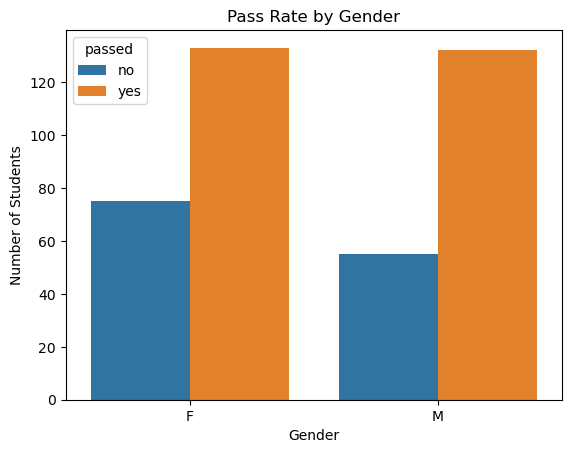

In [56]:
#Pass Rate by Gender

sns.countplot(x="sex", hue="passed", data=sd)
plt.title("Pass Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()

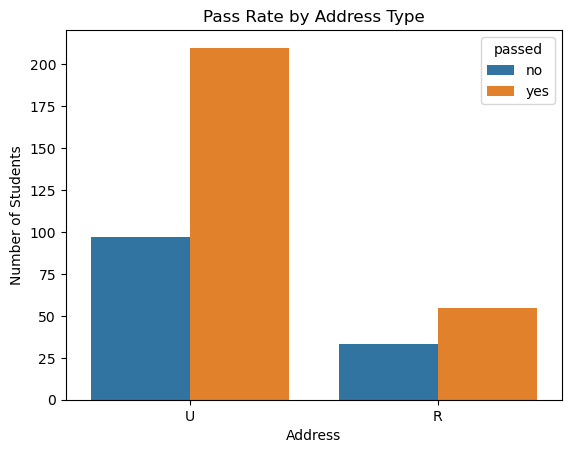

In [57]:
#Pass Rate by Address Type

sns.countplot(x="address", hue="passed", data=sd)
plt.title("Pass Rate by Address Type")
plt.xlabel("Address")
plt.ylabel("Number of Students")
plt.show()

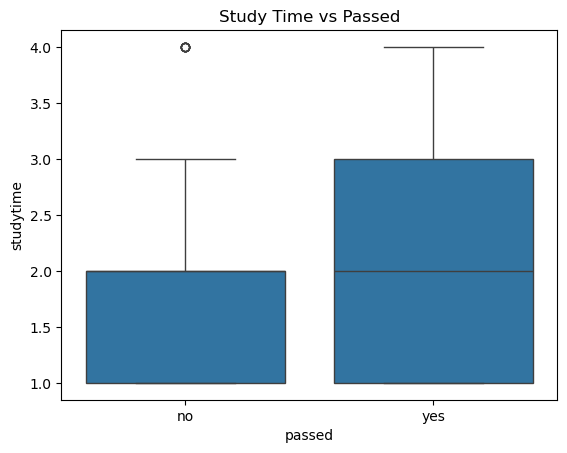

In [58]:
#Study Time vs Passed

sns.boxplot(x="passed", y="studytime", data=sd)
plt.title("Study Time vs Passed")
plt.show()

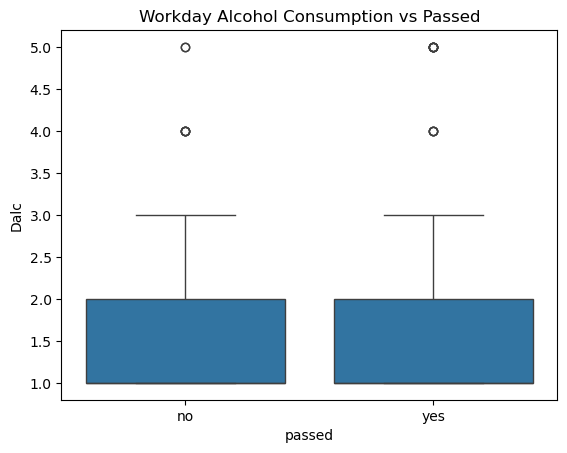

In [59]:
#Alcohol Consumption vs Passed

sns.boxplot(x="passed", y="Dalc", data=sd)
plt.title("Workday Alcohol Consumption vs Passed")
plt.show()

## 2 - Data Cleaning and Preprocessing

This step involves preparing the data for machine learning algorithms by ensuring data quality and consistency. It includes handling missing values, encoding categorical variables, scaling numerical features, and potentially creating or selecting relevant features.

### 2.1 - Handling Missing Values

Before applying any machine learning techniques, it is essential to address missing values in the dataset. Missing data can cause errors or lead to unreliable model performance.

In this step, we:
- Checked for missing values across all columns.
- Replaced **categorical missing values** with the **most frequent category** (mode).
- Replaced **numerical missing values** with the **median** value.

These strategies are widely used as they preserve the data's distribution without being influenced by outliers.


In [60]:
# Check for missing values per column
print("\nMissing values per column:")
print(sd.isnull().sum())

# Fill missing values accordingly
for column in sd.columns:
    if sd[column].dtype == "object":
        sd[column] = sd[column].fillna(sd[column].mode()[0])
    else:
        sd[column] = sd[column].fillna(sd[column].median())

# Confirm no missing values remain
print("\nMissing values after imputation:")
print(sd.isnull().sum())


Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

Missing values after imputation:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc         

### 2.2 - Encoding Categorical Variables

Most machine learning algorithms require numerical input. Therefore, categorical variables (such as `"school"`, `"sex"`, or `"address"`) must be converted into a numerical format.

We use **One-Hot Encoding**, which creates a new binary column for each category in a variable. This method avoids imposing an ordinal relationship between categories, which would be incorrect for nominal variables.

To avoid redundancy and multicollinearity, we drop the first category of each encoded feature.


In [61]:
# Identify categorical columns#Encoding Categorical Variables
categorical_cols = sd.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical columns:", categorical_cols)



Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed']


In [62]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(sd, columns=categorical_cols, drop_first=True)


In [63]:
# Check encoded dataframe
df_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,True
3,15,4,2,1,3,0,3,2,2,1,1,5,2,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True


### 2.3 - Boolean Value Treatment

In this step, we process the boolean features previously identified.

Although these variables are stored as strings (`'yes'` / `'no'`), they represent binary decisions. For this reason, we convert them into numerical format:

- `'yes'` → `1`
- `'no'` → `0`

This transformation is essential to ensure all data is numerical and compatible with machine learning algorithms.


In [64]:
# Convert boolean columns ("yes"/"no") to 1 and 0
for col in boolean_features:
    sd[col] = sd[col].map({'yes': 1, 'no': 0})

# Confirm transformation
sd[boolean_features].head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,1,0,0,0,1,1,0,0,0
1,0,1,0,0,0,1,1,0,0
2,1,0,1,0,1,1,1,0,1
3,0,1,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0,1


### 2.4 - Feature Scaling

Feature scaling ensures that all numeric variables contribute equally to the model's learning process. This is particularly important for distance-based algorithms (e.g., KNN, SVM) and gradient-based methods.

We apply **Standardization**, which transforms numeric features to have a **mean of 0** and a **standard deviation of 1**. This method preserves the shape of the distribution and is robust for many machine learning algorithms.


In [65]:
# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Apply standardization
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Preview the scaled dataset
df_encoded.head()


Numeric columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,True
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True,True
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True


### 2.5 - Feature Engineering & Selection

Feature engineering consists in creating new features or transforming existing ones to improve the predictive power of the model.

Here, we perform a **correlation analysis** to identify relationships between features and the target variable. Features that are highly correlated with others may be redundant and candidates for removal.

We also highlight the option to create new features based on domain knowledge.


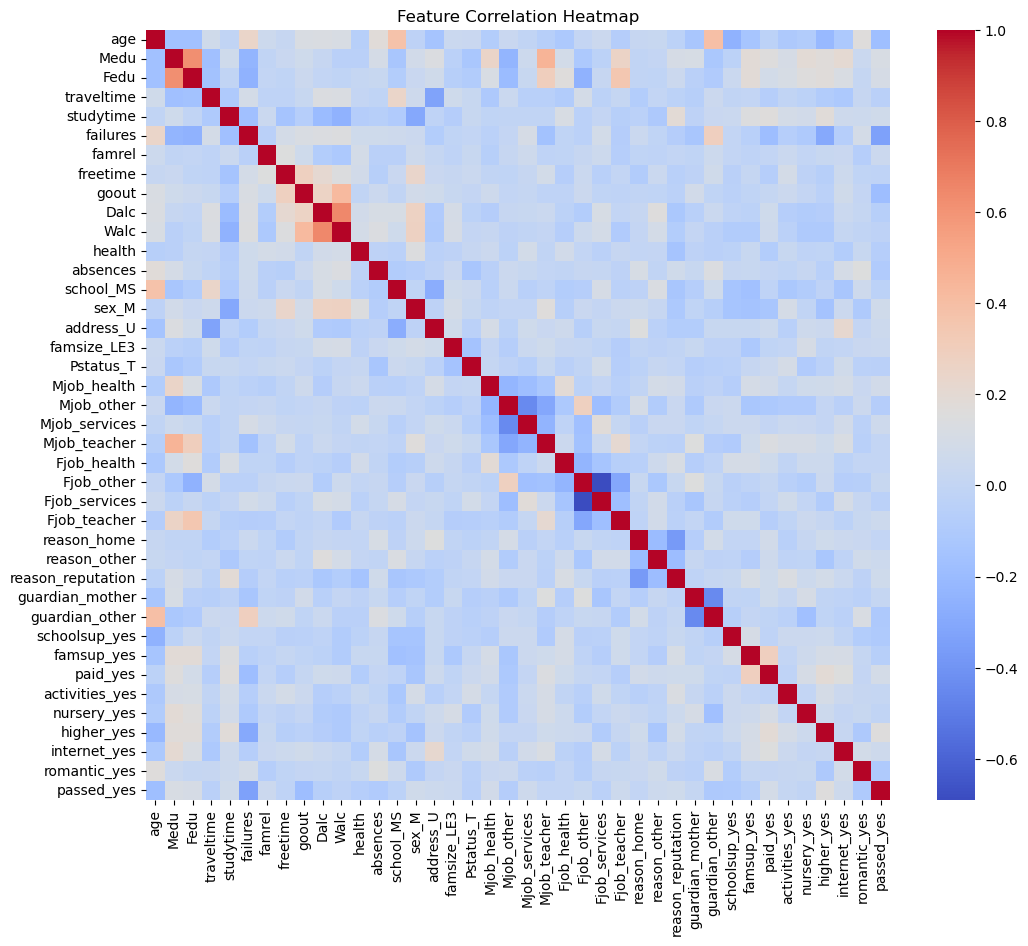

In [66]:
# Display correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df_encoded.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Optional: Create new features if needed
# Example:
# df_encoded['studytime_failures'] = df_encoded['studytime'] * df_encoded['failures']


### 2.5.1 - Feature Selection using F-Score (SelectKBest)

To determine which features are most informative for predicting the target variable (`passed`), we apply the **SelectKBest** method from `sklearn.feature_selection`.

This method uses a **univariate statistical test** — in this case, the **ANOVA F-test** (`f_classif`) — to evaluate the strength of the relationship between each feature and the target.

The goal is to:
- **Identify the top-k most relevant features** that have the highest statistical association with the outcome.
- **Optionally reduce dimensionality**, which can simplify the model and improve performance.

This approach helps us better understand which features may have stronger predictive power, and allows us to focus our modeling efforts on the most meaningful variables.


In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Create X and y for feature selection
X = df_encoded.drop("passed_yes", axis=1)
y = df_encoded["passed_yes"]

# Apply SelectKBest with F-score function
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Build a full feature score table
scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

# Display full table without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Show the table
scores.reset_index(drop=True, inplace=True)
scores


,Feature,F-Score,P-Value
0,failures,50.597848,5.400718e-12
1,goout,13.678669,2.477698e-04
2,age,13.105968,3.328534e-04
3,higher_yes,10.023888,1.665747e-03
4,Medu,5.303925,2.179894e-02
5,Fedu,4.643006,3.178733e-02
6,guardian_other,4.636043,3.191500e-02
7,schoolsup_yes,3.958496,4.732800e-02
8,romantic_yes,3.790317,5.226194e-02
9,paid_yes,3.403875,6.579565e-02


### 2.5.2 - Dimensionality Reduction with SelectKBest

After evaluating the importance of each feature using the ANOVA F-test, we proceed with dimensionality reduction.

We apply `SelectKBest` to retain only the **top 10 most relevant features**. This helps:

- Reduce model complexity
- Avoid overfitting
- Improve training time and efficiency

The selected features are those with the strongest statistical relationship with the target variable (`passed`). They will be used in the modeling phase.


In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

# Set the number of top features to retain
k = 10

# Apply SelectKBest to keep top k features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get names of selected features
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with reduced features
X_reduced = pd.DataFrame(X_new, columns=selected_features)

# Show selected features
print(f"Selected top {k} features:")
print(selected_features.tolist())

# Preview the reduced dataset
X_reduced.head()


Selected top 10 features:
['age', 'Medu', 'Fedu', 'failures', 'goout', 'guardian_other', 'schoolsup_yes', 'paid_yes', 'higher_yes', 'romantic_yes']


,age,Medu,Fedu,failures,goout,guardian_other,schoolsup_yes,paid_yes,higher_yes,romantic_yes
0,1.023046,1.143856,1.360371,-0.449944,0.801479,0.0,1.0,0.0,1.0,0.0
1,0.238380,-1.600009,-1.399970,-0.449944,-0.097908,0.0,0.0,0.0,1.0,0.0
2,-1.330954,-1.600009,-1.399970,3.589323,-0.997295,0.0,1.0,1.0,1.0,0.0
3,-1.330954,1.143856,-0.479857,-0.449944,-0.997295,0.0,0.0,1.0,1.0,1.0
4,-0.546287,0.229234,0.440257,-0.449944,-0.997295,0.0,0.0,1.0,1.0,0.0


### 2.6 - Outlier Capping

Instead of removing outliers, we applied a **capping strategy** to reduce their influence.

This approach replaces extreme values (above the upper IQR threshold) with a fixed maximum, allowing us to:

- Keep all data points
- Reduce the distortion caused by outliers
- Maintain dataset balance and integrity

This ensures the models are less affected by extreme values, without losing potentially useful information.


In [69]:
# Apply capping to numeric features using IQR
for col in numeric_features:
    Q1 = sd[col].quantile(0.25)
    Q3 = sd[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR

    # Cap values above the upper limit
    sd[col] = sd[col].apply(lambda x: min(x, upper_limit))

# Visual confirmation
sd[numeric_features].describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.693671,2.749367,2.521519,1.437975,2.001266,0.0,3.944304,3.235443,3.108861,1.435443,2.291139,3.554430,5.187342
std,1.266449,1.094735,1.088201,0.663077,0.765283,0.0,0.896659,0.998862,1.113278,0.741455,1.287897,1.390303,5.694448
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.0,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.0,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,21.000000,4.000000,4.000000,3.500000,3.500000,0.0,5.000000,5.000000,5.000000,3.500000,5.000000,5.000000,20.000000


### 2.6 - Final Remarks

At the end of the data cleaning and preprocessing phase, we obtained a clean, consistent, and ready-to-use dataset.

The following steps were carried out to ensure the data is properly prepared for modeling:

- **Missing values** were handled using median imputation for numeric variables and mode for categorical ones.
- **Boolean features** (with values 'yes'/'no') were identified and converted to binary (1/0) format.
- **Categorical features** were encoded using one-hot encoding to ensure compatibility with machine learning algorithms.
- **Numerical features** were scaled using standardization (`StandardScaler`) to normalize their ranges.
- **Outlier values** were not removed, but capped using the IQR method to reduce their impact while preserving all data points.
- **Feature selection** was performed using `SelectKBest` with ANOVA F-score to retain the top 10 most relevant features.

As a result, we now have a fully numerical, normalized, and dimensionally optimized dataset stored in `X_reduced`, ready for the supervised learning phase.


## 3. Data Modeling (Amanda)